In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [2]:
POPULATION_SIZE = 100
#MUTATION_RATE = 0.05
MUTATION_RATE = 0.20
#MUTATION_RATE = 0.75

queens = 8
maxFitness = (queens * (queens - 1)) / 2  

In [3]:
def generate_chromosome(queens):  
    return [random.randint(1, queens) for x in range(queens)]

In [4]:
def generate_population():
    return [generate_chromosome(queens) for x in range(POPULATION_SIZE)]

In [5]:
def fitness(chromosome):
    horizontal_attack = sum([chromosome.count(queen) - 1 for queen in chromosome]) / 2
    diagonal_attack = 0

    n = len(chromosome)
    left_diagonal = [0] * 2 * n
    right_diagonal = [0] * 2 * n
    for i in range(n):
        left_diagonal[i + chromosome[i] - 1] += 1
        right_diagonal[len(chromosome) - i + chromosome[i] - 2] += 1

    diagonal_attack = 0
    for i in range(2 * n - 1):
        counter = 0
        if left_diagonal[i] > 1:
            counter += left_diagonal[i] - 1
        if right_diagonal[i] > 1:
            counter += right_diagonal[i] - 1
        diagonal_attack += counter / (n - abs(i - n + 1))

    return int(maxFitness - (horizontal_attack + diagonal_attack))  

In [6]:
def selection_probability(chromosome, fitness):
    return fitness(chromosome) / maxFitness

In [7]:
def selection(population, probability):
    population_probabilty = zip(population, probability)
    total = sum(q for p, q in population_probabilty)
    r = random.uniform(0, total)
    limit = 0
    for p, q in zip(population, probability):
        if limit + q >= r:
            return p
        limit += q
    assert False, "STOP"

In [8]:
def crossover(x, y):  
    n = len(x)
    c = random.randint(0, n - 1)
    return x[0:c] + y[c:n]

In [9]:
def mutation(x):  
    n = len(x)
    a = random.randint(0, n - 1)
    b = random.randint(1, n)
    x[a] = b
    return x

In [10]:
def genetic_algorithm(population, fitness):
    new_population = []
    parent_probability = [selection_probability(n, fitness) for n in population]
    for i in range(len(population)):
        x = selection(population, parent_probability)  
        y = selection(population, parent_probability) 
        child = crossover(x, y) 
        if random.random() < MUTATION_RATE:
            child = mutation(child)
        print_chromosome(child)
        new_population.append(child)
        if fitness(child) == maxFitness: break
    return new_population


In [11]:
def print_chromosome(individual):
    print("Chromosome = {},  Fitness = {}"
          .format(str(individual), fitness(individual)))

In [12]:
population = generate_population()

generation = 1
avg_fitness = []
generation_num = []

while not maxFitness in [fitness(indv) for indv in population]:
    print("***Generation {} ***".format(generation))
    population = genetic_algorithm(population, fitness)
    print("")
    avg = np.mean([fitness(n) for n in population])
    avg_fitness.append(avg)
    generation_num.append(generation)
    print("Maximum Fitness = {}".format(max([fitness(n) for n in population])))
    generation += 1
    
    
final_chromosome = []
print("Solved in Generation {}".format(generation - 1))
for individual in population:
    if fitness(individual) == maxFitness:
        print(" ")
        print("Final solution: ")
        final_chromosome = individual
        print_chromosome(individual)

***Generation 1 ***
Chromosome = [1, 2, 2, 1, 8, 7, 5, 7],  Fitness = 24
Chromosome = [8, 3, 6, 7, 1, 7, 4, 8],  Fitness = 25
Chromosome = [4, 4, 7, 6, 2, 4, 7, 2],  Fitness = 22
Chromosome = [6, 6, 3, 4, 2, 5, 5, 5],  Fitness = 23
Chromosome = [4, 2, 5, 7, 5, 1, 5, 2],  Fitness = 23
Chromosome = [3, 1, 5, 4, 4, 6, 6, 7],  Fitness = 25
Chromosome = [7, 2, 8, 7, 3, 7, 3, 4],  Fitness = 23
Chromosome = [7, 2, 8, 8, 5, 5, 6, 7],  Fitness = 24
Chromosome = [5, 1, 4, 1, 2, 5, 4, 8],  Fitness = 24
Chromosome = [6, 8, 2, 8, 5, 5, 7, 5],  Fitness = 23
Chromosome = [3, 6, 2, 1, 8, 2, 3, 1],  Fitness = 24
Chromosome = [3, 3, 2, 5, 2, 5, 1, 6],  Fitness = 24
Chromosome = [4, 8, 2, 5, 2, 5, 1, 3],  Fitness = 25
Chromosome = [2, 8, 7, 3, 5, 7, 5, 5],  Fitness = 23
Chromosome = [4, 2, 4, 1, 2, 5, 4, 8],  Fitness = 22
Chromosome = [5, 6, 4, 2, 7, 6, 4, 2],  Fitness = 24
Chromosome = [6, 1, 4, 7, 8, 3, 8, 3],  Fitness = 25
Chromosome = [8, 2, 1, 6, 7, 4, 3, 8],  Fitness = 25
Chromosome = [1, 4, 6, 8, 

In [13]:
board = []

for x in range(queens):
    board.append(["*"] * queens)

for i in range(queens):
    board[queens - final_chromosome[i]][i] = "Q"


In [14]:
def print_board(board):
    for row in board:
        print(" ".join(row))
print()
print_board(board)


* * * * Q * * *
* * * * * * Q *
* Q * * * * * *
* * * * * Q * *
* * Q * * * * *
Q * * * * * * *
* * * * * * * Q
* * * Q * * * *


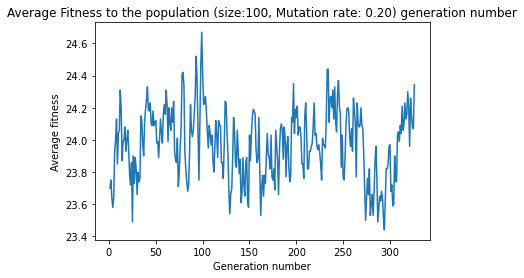

In [15]:
x = np.array(generation_num)
y = np.array(avg_fitness)
plt.title("Average Fitness to the population (size:100, Mutation rate: 0.20) generation number")
plt.xlabel("Generation number")
plt.ylabel("Average fitness")

plt.plot(x, y)
plt.show()